# FIT1043 Introduction to Data Science

## Assignment 2
### Aw Shen Yang 
### 33520089

# Introduction


The purpose of this report is to conduct predictive analytics and clustering analysis by building predictive models and applying k-means clustering on datasets using Python in the Jupyter Notebook environment. These datasets contain features of songs and their music genres, aiming to explore the effectiveness of different machine learning algorithms in predicting music genres and identifying clusters based on movie's IMDb ratings and gross value.

The report's outline consists of:
1. Introduction
2. Importing Necessary Libraries
3. Read and describe the data using basic statistics
4. Split the dataset into training and testing
5. Conduct multi-class classification using Support Vector Machine (SVM)
6. Evaluate and compare predictive models
7. Explore different datasets and select a particular dataset that meets certain criteria
8. Deal wit hmissing data
9. Conduct clustering using k-means
10. Conclusion
11. References

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Part A: Classification
### A1. Supervised Learning

#### A1.1. Explain supervised machine learning, the notion of labelled data, and train and test datasets
Supervised Machine Learning:

- Supervised machine learning, is a subcategory of machine learning and artificial intelligence, and is use to train predictive models by using both input and output data pairs (labelled data). 
- In the process of training, algorithms learn patterns and relationships within the data in order to make accurate predictions on unseen new data sets. 
- For example, common tasks in supervised learning include:
- Classification, where the output variable is categorical. 
- Regression, where the output variable is continuous.

Labeled Data:

- Labeled data consists of input examples matched with corresponding output labels.
- These labels represent the correct outcomes that the model aims to predict during training.
- For example, in a classification task, each example will be labeled with the correct class or category.

Train and Test Datasets:

- The training dataset is used to train the model by supplying input and output data pairs, allowing the model to learn from the data. 
- After training, the test dataset is used to evaluate the performance of the trained model on unseen data. Classification metrics such as accuracy, sensitivity, specificity, false positive rate and precision are commonly used to measure the model's performance on the test dataset.
- Normally the datasets are splited 75% for training and 25% for testing but this can vary depends on the size and nature of the dataset. 


#### A1.2. Readthe ‘FIT1043-MusicGenre-Dataset.csv’ file and separate the features and the label (Hint: the label, in this case, is the ‘music_genre’)

In [2]:
dataset = pd.read_csv('FIT1043-MusicGenre-Dataset.csv')
dataset.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5


In [3]:
dataset.shape

(25958, 15)

In [4]:
# separate the features and label
# pick all columns to train and test except instance id, artist name 
# and track name to increase the accuracy.
X = dataset.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]].values 

# separate the label: music genre, which is in the last column
y = dataset.iloc[:,-1].values 

#### A1.3. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.

In [5]:
# Split the data into training and testing sets
# test size is set to 0.25, 75% of the data is trained and 
# 25% will be used to test it
# X contains features of data 
# y contains target value of data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.25, random_state = 0)

### A2. Classification(training)

#### A2.1. Explain the difference(s) between binary and multi-class classification.

1. Decision Boundary and Class Prediction. 
- Binary Classification - The decision boundary separates two classes where each data sample is assigned one and only one label from two mutually exclusive classes.
- Multi-Class classification - Multiple decision boundaries are required to separate three or more classes where each data sample is assigned one and only one label from more than two classes.

2. Output Representation
- Binary Classification - the output is usually represented as binary value, 0 or 1. 
- Multi-Class classification - the output is usually represented in one-hot encoding or interger labels corresponding to different classes.

3. Size of confusion matrix:
- Binary Classification - 2x2 matrix, representing the counts of true positives, false positives, true negatives, and false negatives.
- Multi-Class classification - depends on the number of classes being predicted, with each row and column corresponding to different classes.

4. Example
- Binary Classification - spam detection(spam or not spam), Medical testing (healthy or diseased), and sentiment analysis (positive or negative sentiment).
- Multi-Class classification - image recognition (recognizing different types of vegetables), music genre categorization (classifying music into different genres), and product categorization in e-commerce (assigning products to various categories such as electronics, clothing, or home goods).


####  A2.2. In preparation for classification, your data should be normalised/scaled. 

#### a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).
Normalization, also known as feature scaling, is important in preparing data for machine learning algorithms. 

Raw data often contains features with varying scales and range. In some algorithms, such as those based on distance calculations (e.g., k-nearest neighbors, support vector machines), features with larger scales can dominate those with smaller scales, leading to biased models.

For instance, imagine a dataset containing features like age (ranging from 0 to 100) and income (ranging from 20,000 to 200,000). Without normalization, it will cause bias as the model might prioritize income over age due to its larger scale, leading to inaccurate results. 

Therefore, normalization makes sure that all the different features in our data have a fair chance of being considered by the model. It does this by adjusting the scale of each features so that they are all in a similar range. This reduces bias and improves convergence speed. As a result, the model becomes more stable, runs faster, and performs better across different types of machine learning tasks. 

####  b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

In [6]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### A2.3. Use the Support Vector Machine algorithm to build the model.
##### a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning.
a. Support Vector Machine (SVM):

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It works by finding the best possible line or boundary, also called hyperplane, which separates different classes of data points in an N-dimensional space by maximizing the margin, which is the distance between the hyperplane and the nearest data points of each class. As a result, it ensure the model is strong and able to work well with new data by keeping the different groups of data separate. This helps the model classify things more accurately. As the nearest data points are also known as support vectors, therefore the algorithm is called Support Vector Machine Algorithm.

SVMs use special functions called kernel functions to transform the data into a space where it's easier to draw this boundary. This allows SVM to solve complex non-linear problems such as image classification, text classification, and bioinformatics, by looking at the data from different angles.

The C parameter in SVM balances between underfitting and overfitting on the training data. A smaller C makes the margin wider and more misclassification while a larger C makes the margin narrower and aims to minimize errors and potentially more overfitting.

##### b. In SVM, there is something called the kernel. Explain what you understand from it.
b. Kernel in SVM:

In SVM, a kernel is like a special function that helps to change how we look at the data. It transforms the input data into a higher-dimensional space, making it easier to separate different groups of data points with a hyperplane. Kernels are useful for handling non-linear data, as they help find a new perspective where a straight line can separate the groups. There are different types of kernel functions, like linear, polynomial, and radial basis function (RBF), and the one we choose affects how well the SVM works. 

For example, in my case which is music genre prediction, radial basis function (RBF) kernel is used because music data shows complex and non-linear relationship between various features such as acousticness, danceability and energy. This kernel transforms the data in a way that helps the SVM model accurately classify music genres based on the patterns it finds.

##### c. Write the code to build a predictive SVM model using your training dataset.(Note: You are allowed to engineer or remove features as you deem appropriate)

In [7]:
# build SVM model
svm_model = SVC(kernel='rbf', C = 8)  # Radial Basis Function (RBF) kernel
svm_model.fit(X_train_sc, y_train)

SVC(C=8)

#### A2.4. Repeat Task A2.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM

In [8]:
# Using Random Forest algorithm
rf_model = RandomForestClassifier(
n_estimators = 20,
criterion = 'entropy',
random_state = 0
)
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

### A3. Classification (prediction)
#### A3 1.Using the testing dataset you created in Task A1.3 above, conduct the prediction for the ‘music_genre’ (label) using the two models built by SVM and your other classification algorithm in A2.4.

In [9]:
# Predict using SVM model
svm_predictions = svm_model.predict(X_test_sc)

In [10]:
# Predict using Random Forest classifier
rf_predictions = rf_model.predict(X_test_sc)

#### A3.2. Display the confusion matrices for both models (it should look like a 10x10 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification problem setting.

In [11]:
# Display 10x10 confusion matrices for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Confusion Matrix for SVM:")
svm_conf_matrix

Confusion Matrix for SVM:


array([[247,   9,  10,   1, 112,  33,  66,  30,  22, 128],
       [ 17, 495,  44,  31,  15,  25,   0,   8,   0,   4],
       [ 37,  84, 349,  11,  74,  29,   1,  65,   1,  26],
       [ 18,  27,  17, 563,   4,   7,   0,  26,   0,   7],
       [ 45,  12,  40,   2, 359,  13,  14,  42,  10, 101],
       [ 37,  30,  37,  10,  39, 372,  18,  59,   6,  23],
       [ 32,   1,   1,   0,   9,   4, 324,   6, 223,  39],
       [ 37,  11,  80,  43,  40,  90,  17, 327,   3,  27],
       [ 28,   0,   0,   0,   5,   0, 281,   6, 225,  87],
       [ 61,   0,   1,   2,  37,   3,  25,  10,  35, 458]], dtype=int64)

In [12]:
# Display 10x10 confusion matrices for random forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("\nConfusion Matrix for Decision Tree:")
rf_conf_matrix


Confusion Matrix for Decision Tree:


array([[219,   7,  24,   0,  99,  42,  52,  38,  30, 147],
       [ 14, 488,  41,  44,  14,  24,   0,   8,   1,   5],
       [ 46,  87, 340,  10,  64,  37,   1,  67,   2,  23],
       [ 17,  32,  14, 557,   4,  12,   0,  24,   0,   9],
       [ 50,  11,  41,   1, 361,   8,  10,  39,  12, 105],
       [ 43,  32,  66,   7,  26, 335,  11,  79,   8,  24],
       [ 28,   0,   0,   0,   5,   6, 273,   8, 284,  35],
       [ 37,  11, 112,  51,  35,  89,  10, 284,   9,  37],
       [ 31,   1,   1,   0,  11,   5, 328,   5, 190,  60],
       [101,   2,   8,   3,  59,   8,  26,  14,  45, 366]], dtype=int64)

#### A3.3. Compare the performance of SVM and your other classifier and provide your justification of which one performed better.

In [13]:
import numpy as np

# Confusion matrices
svm_conf_matrix = np.array(svm_conf_matrix)

rf_conf_matrix = np.array(rf_conf_matrix)

# Function to calculate metrics
def calculate_metrics(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_positives = np.sum(conf_matrix, axis=0) - true_positives
    false_negatives = np.sum(conf_matrix, axis=1) - true_positives
    true_negatives = np.sum(conf_matrix) - (true_positives + false_positives + false_negatives)

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    precision = true_positives / (true_positives + false_positives)
    neg_pred_value = true_negatives / (true_negatives + false_negatives)

    return accuracy, sensitivity, specificity, precision, neg_pred_value

# Calculate metrics for SVM
svm_accuracy, svm_sensitivity, svm_specificity, svm_precision, svm_neg_pred_value = calculate_metrics(svm_conf_matrix)

# Calculate metrics for Random Forest
rf_accuracy, rf_sensitivity, rf_specificity, rf_precision, rf_neg_pred_value = calculate_metrics(rf_conf_matrix)

# Calculate average values for SVM metrics
svm_avg_accuracy = np.mean(svm_accuracy)
svm_avg_sensitivity = np.mean(svm_sensitivity)
svm_avg_specificity = np.mean(svm_specificity)
svm_avg_precision = np.mean(svm_precision)
svm_avg_neg_pred_value = np.mean(svm_neg_pred_value)

# Calculate average values for Random Forest metrics
rf_avg_accuracy = np.mean(rf_accuracy)
rf_avg_sensitivity = np.mean(rf_sensitivity)
rf_avg_specificity = np.mean(rf_specificity)
rf_avg_precision = np.mean(rf_precision)
rf_avg_neg_pred_value = np.mean(rf_neg_pred_value)

# Print out the average values
print("Average SVM Metrics:")
print("Accuracy:", svm_avg_accuracy)
print("Sensitivity:", svm_avg_sensitivity)
print("Specificity:", svm_avg_specificity)
print("Precision:", svm_avg_precision)
print("Negative Predictive Value:", svm_avg_neg_pred_value)
print("\nAverage Random Forest Metrics:")
print("Accuracy:", rf_avg_accuracy)
print("Sensitivity:", rf_avg_sensitivity)
print("Specificity:", rf_avg_specificity)
print("Precision:", rf_avg_precision)
print("Negative Predictive Value:", rf_avg_neg_pred_value)


Average SVM Metrics:
Accuracy: 0.914607087827427
Sensitivity: 0.5731511224065182
Specificity: 0.952582925583951
Precision: 0.5733372511911871
Negative Predictive Value: 0.9527281609933503

Average Random Forest Metrics:
Accuracy: 0.9051771956856702
Sensitivity: 0.525577329713142
Specificity: 0.9473392986914939
Precision: 0.5242503897860986
Negative Predictive Value: 0.9474162299936018


Based on the average metrics obtained from the SVM and Random Forest classifiers, we can analyze their performance as follows:

Accuracy:

SVM: The average accuracy of the SVM classifier is approximately 91.46%.
Random Forest: The average accuracy of the Random Forest classifier is approximately 90.52%.
Analysis: SVM performs slightly better in terms of accuracy compared to Random Forest.

Sensitivity (True Positive Rate):

SVM: The average sensitivity of the SVM classifier is approximately 57.32%.
Random Forest: The average sensitivity of the Random Forest classifier is approximately 52.56%.
Analysis: SVM demonstrates higher sensitivity, indicating its ability to correctly identify positive instances (music genres) more effectively than Random Forest.

Specificity (True Negative Rate):

SVM: The average specificity of the SVM classifier is approximately 95.26%.
Random Forest: The average specificity of the Random Forest classifier is approximately 94.73%.
Analysis: SVM exhibits slightly higher specificity, indicating its proficiency in correctly identifying negative instances (non-music genres) compared to Random Forest.

Precision:

SVM: The average precision of the SVM classifier is approximately 57.33%.
Random Forest: The average precision of the Random Forest classifier is approximately 52.43%.
Analysis: SVM achieves slightly higher precision, suggesting that when it predicts a music genre, it is more likely to be correct compared to Random Forest.

Negative Predictive Value:

SVM: The average negative predictive value of the SVM classifier is approximately 95.27%.
Random Forest: The average negative predictive value of the Random Forest classifier is approximately 94.74%.
Analysis: SVM demonstrates slightly higher negative predictive value, indicating its ability to correctly predict non-music genres more effectively than Random Forest.

Overall, based on these metrics, SVM shows a slightly better performance compared to Random Forest in classifying music genres. 






### A4. Independent evaluation
#### A4.1. Read the ‘FIT1043-MusicGenre-Submission.csv’ file and use the best model you built earlier to predict the ‘music_genre’ for the songs in this file.

In [14]:
# Read the submission file and make predictions
dataset_2 = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
dataset_2.shape

(6490, 14)

In [15]:
dataset_2.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,49290,The Wood Brothers,One Drop of Truth,27,0.06240,0.436,218227,0.663,0.001510,0.0759,-5.897,0.0510,117.956,0.360
1,81619,Pusha T,Hard Piano,62,0.03470,0.582,195733,0.778,0.000000,0.2100,-3.776,0.1780,82.193,0.205
2,31979,EXILE,運命のヒト - EXILE BALLAD BEST,35,0.69200,0.269,324480,0.331,0.000000,0.0851,-9.253,0.0338,139.338,0.250
3,35985,empty_field,Nobody,47,0.68200,0.428,256267,0.454,0.000005,0.2160,-9.952,0.4940,173.272,0.573
4,25426,Rammstein,OHNE DICH,48,0.00409,0.404,271173,0.599,0.000252,0.1130,-5.565,0.0289,136.045,0.195


In [16]:
X_2 = dataset_2.iloc[:, 3:].values

X_submission_sc = sc.transform(X_2)

# Make predictions using SVM model
submission_predictions = svm_model.predict(X_submission_sc)

#### A4.2. Unlike the previous section in which you have a testing dataset where you know the ‘music_genre’ class and will be able to test for the accuracy, in this part, you don’t have a ‘music_genre’ and you have to predict it and submit the predictions along with other required submission files. a. Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘instance_id’ and ‘music_genre’. It should have a total of 6491 lines (1 header, and 6490 entries)

In [17]:
# Output predictions to CSV
dataset_2['music_genre'] = submission_predictions
dataset_2.to_csv('33520089-AwShenYang-v6.csv', columns = ['instance_id', 'music_genre'], index=False)

### A5 Kaggle Competition

 “33520089-AwShenYang-v2.csv” is submitted to Kaggle

### Part B : Selection of Dataset and perform Clustering

### B1. Selection of a Dataset with missing Clustering data,
 We have demonstrated a k-means clustering algorithm in week 7.
 Your task in this part is to find an interesting dataset and apply
 k-means clustering on it using Python. For instance, Kaggle is a
 private company which runs data science competitions and provides
 https://www.kaggle.com/datasets
#### B1.1. Select a suitable dataset that contains some missing data and at least two numerical features. Please note you cannot use the same data set used in the applied sessions/lectures in this unit. Please include a link to your dataset in your report. You may wish to:
#### ● provide the direct link to the public dataset from the internet, or
#### ● place the data file in your Monash student- google drive and provide its link in the submission.

This is a dataset I have selected

https://www.kaggle.com/datasets/prishasawhney/imdb-dataset-top-2000-movies

This dataset is scraped from IMDB's official website. and contains information as below: 
- The name of the movie
- The Year of release
- The running time of the movie (in minutes)
- It's IMDB Rating
- It's metascore
- The number of votes it got
- The Genre of the movie
- The director of the movie
- The cast of the movie
- Gross value

#### B1.2. Perform k-means clustering, choosing two numerical features in your dataset, and apply k-means clustering to your data to create k clusters in Python (k>=2)

In [18]:
df = pd.read_csv('imdb_top_2000_movies.csv')

In [19]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [20]:
df.shape

(2000, 10)

In [21]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_data)

Number of missing values for each column:
Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64


There are missing value on metascore and gross value.
The two numerical features I am chosing are **IMDB rating** and **gross value**

In [22]:
# As the value of the Gross is in "$123.45M" string format
# Therefore, we need to convert it the numeric first
df['Gross'] = df['Gross'].astype(str)

df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '')

df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Remove rows with NaN values
df_filtered = df.dropna()

# Check the type of the gross column
df_filtered['Gross']

0       134.97
1        57.30
2        54.80
3        44.82
5       132.09
         ...  
1995     11.00
1996     60.02
1997     33.31
1998     15.28
1999     31.69
Name: Gross, Length: 1870, dtype: float64

In [23]:
# check whether the row is reduced
df_filtered.shape


(1870, 10)

After filter out the missing the data, there will be 1870 rows remaining out of the original 2000 rows.

Text(0, 0.5, 'Gross')

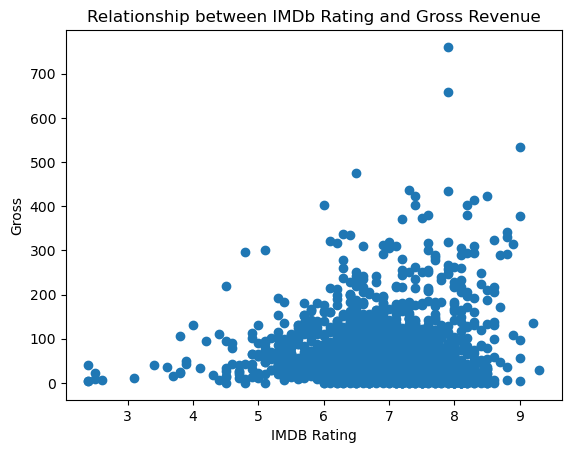

In [24]:
plt.scatter(x=df_filtered['IMDB Rating'],y=df_filtered['Gross'])
plt.title("Relationship between IMDb Rating and Gross Revenue")
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')

C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

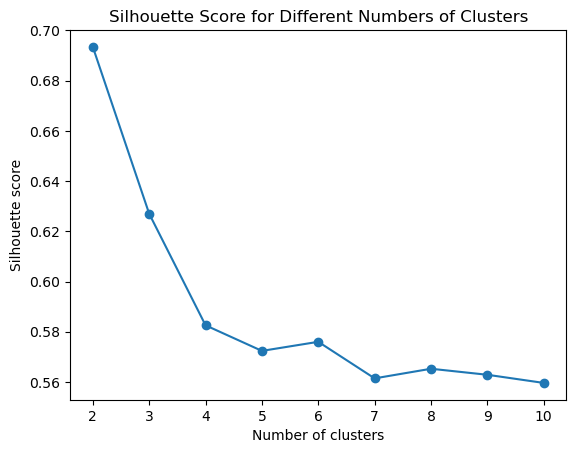

In [25]:
# Use sihouette scores to determine the best number of cluster
silhouette_scores = []

cluster_range = range(2, 11)

# Iterate through each cluster number
for num_clusters in cluster_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    
    # Fit KMeans to the data
    kmeans.fit(df_filtered[['IMDB Rating', 'Gross']])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_filtered[['IMDB Rating', 'Gross']], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the graph
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

Based on the silhouette score, it shows the best number of cluster is 2

In [26]:
# Perform k-means clustering and choosing 2 numerical features 

kmeans = KMeans(n_clusters= 2).fit(df_filtered[['IMDB Rating', 'Gross']])


C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alvin Aw\Downloads\AnacondaDownload\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [27]:
# The Two cluster centers
kmeans.cluster_centers_

array([[  7.06790541, 199.34405405],
       [  6.88945362,  42.17851334]])

In [28]:
#The cLuster labels
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

#### B1.3. Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.

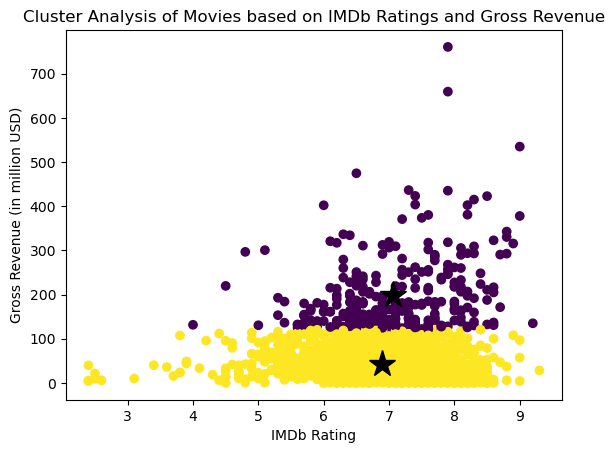

In [29]:
# Scatter plot with cluster labels
plt.scatter(
    x=df_filtered['IMDB Rating'],
    y=df_filtered['Gross'],
    c=kmeans.labels_,
)

# Plot cluster centers
plt.plot(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    'k*',
    markersize= 20
)
plt.title("Cluster Analysis of Movies based on IMDb Ratings and Gross Revenue")
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Revenue (in million USD)')
plt.show()



Based on the visualisation on the movie data and applying K-means clustering, it shows 2 distinct clusters that represent relationship between critical acclaim, as reflected by IMDb ratings, and commercial success, measured by gross revenue. The clusters highlight different movies can have very different rating and gross value in the movie industry, showing the multifaceted nature of audience preferences and market dynamics.

In Cluster 1, we can observe there are movies with IMDb ratings from 1 to 10, but gross values remain under 120 million USD. This cluster include different movie genres, including niche favorites, like documentaries or musicals, which has small but dedicated fan bases. Certain movies may prioritize artistic expression or experimental storytelling over conventional entertainment value. Thus, they might not be the cup of tea of wider audience, leading to lower IMDb ratings and low gross earning. Also, some of these movie might be lesser-known and struggle to attract broad audiences despite receiving positive reviews hence having high rating but low gross earnings.

In Cluster 2, we can observe there are movies with high IMDb ratings of 5 and above, accompanied by high gross values exceeding 120 million USD. This cluster highlights blockbuster hits movies that have achieved both audiences preference and significant commercial success. This might because these movies resonate deeply with audiences, often featuring famous celebrities or superhero themes, attracting large crowds to theaters and generating huge revenue through ticket sales and merchandise sales, As a result, they receive high ratings in IMDb and high gross earnings.

This segmentation can provide valuable insights into the complex relationship between audience rating on the movie and gross box office in the film industry, it shows that high ratings do not guarantee high box office success, highlighting the importance of audience preference for a movie to achieve commercially success. By looking at different clusters based on IMDb ratings and how much money they make, stakeholders in the entertainment sector can gain deeper insights into audience preferences and market trends, making strategic decisions related to film production, marketing, distribution, and investment.

### Conclusion
In summary, this report focused on using Python to analyze data and make predictions. In part A, I learned about supervised learning, differentiate between binary and multi-class classification and prepare the data by normalizing it and splitting it to training and testing dataset. After using Support Vector Machine(SVM) and Random Forest model to analyse, it shows that SVM was better at predicting music genres compared to Random Forest. The results are also submitted into a Kaggle competition.

In part B, a dataset of top 2000 movies from IMDb is chosen from Kaggle. After cleaning the data, features like IMDb rating and gross value is analyse using k-means clustering to see the patterns. As a result, the findings emphasized that high ratings do not guarantee high box office success, highlighting the importance of audience preference for a movie to achieve commercially success.

Overall, this report shows how Python can be used to analyze data and gain insights that could be useful for industries like music and film.